Oton vastuu datat:  

- gender
- age
- sat_management
- sat_colleques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')

In [3]:
df.describe()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
count,82.000000,82.000000,82.000000,82.000000,81.000000,80.000000,82.000000,82.000000,81.000000,82.000000,82.000000,82.000000,47.0,20.0,9.0,22.0
mean,41.500000,1.231707,37.951220,1.621951,1.987654,12.175000,2563.878049,3.060976,4.061728,3.219512,2.109756,3.195122,1.0,1.0,1.0,1.0
std,23.815261,0.424519,9.773866,0.487884,0.844006,8.807038,849.350302,1.058155,0.826826,1.154961,1.111179,1.047502,0.0,0.0,0.0,0.0
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,1521.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
25%,21.250000,1.000000,31.000000,1.000000,1.000000,3.750000,2027.000000,2.000000,4.000000,3.000000,1.000000,3.000000,1.0,1.0,1.0,1.0
50%,41.500000,1.000000,37.500000,2.000000,2.000000,12.500000,2320.000000,3.000000,4.000000,3.000000,2.000000,3.000000,1.0,1.0,1.0,1.0
75%,61.750000,1.000000,44.000000,2.000000,3.000000,18.250000,2808.000000,4.000000,5.000000,4.000000,3.000000,4.000000,1.0,1.0,1.0,1.0
max,82.000000,2.000000,61.000000,2.000000,4.000000,36.000000,6278.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0,1.0,1.0


In [4]:
df = df.drop(["number", "healtcare", "holidayCabin", "gym", "muscleCare"], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  82 non-null     int64  
 1   age                     82 non-null     int64  
 2   family                  82 non-null     int64  
 3   education               81 non-null     float64
 4   years_of_service        80 non-null     float64
 5   salary                  82 non-null     int64  
 6   sat_management          82 non-null     int64  
 7   sat_colleques           81 non-null     float64
 8   sat_workingEnvironment  82 non-null     int64  
 9   sat_salary              82 non-null     int64  
 10  sat_tasks               82 non-null     int64  
dtypes: float64(3), int64(8)
memory usage: 7.2 KB


In [6]:
df.describe()

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
count,82.000000,82.000000,82.000000,81.000000,80.000000,82.000000,82.000000,81.000000,82.000000,82.000000,82.000000
mean,1.231707,37.951220,1.621951,1.987654,12.175000,2563.878049,3.060976,4.061728,3.219512,2.109756,3.195122
std,0.424519,9.773866,0.487884,0.844006,8.807038,849.350302,1.058155,0.826826,1.154961,1.111179,1.047502
min,1.000000,20.000000,1.000000,1.000000,0.000000,1521.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,1.000000,31.000000,1.000000,1.000000,3.750000,2027.000000,2.000000,4.000000,3.000000,1.000000,3.000000
50%,1.000000,37.500000,2.000000,2.000000,12.500000,2320.000000,3.000000,4.000000,3.000000,2.000000,3.000000
75%,1.000000,44.000000,2.000000,3.000000,18.250000,2808.000000,4.000000,5.000000,4.000000,3.000000,4.000000
max,2.000000,61.000000,2.000000,4.000000,36.000000,6278.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [23]:
df_gender=pd.crosstab(df["gender"], "Count")
df_gender.index=["Male", "Female"]
df_gender.columns.name=""

In [24]:
df_gender

,Count
Male,63
Female,19


C:\Users\oansa\AppData\Local\Temp\ipykernel_23668\877765268.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  autopct=lambda p: '{:.0f}'.format(p * df_gender.sum()[0] / 100),  # Display count inside the pie


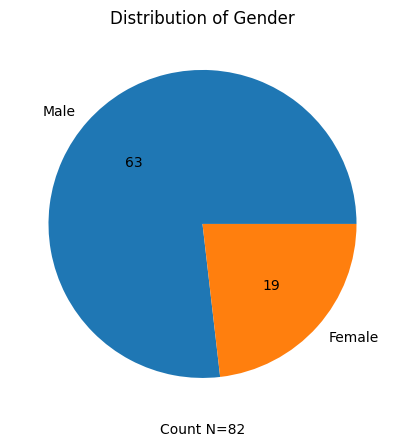

In [29]:
df_gender.plot.pie(
    y="Count",  # Set which column to plot (this is 'Count' in your case)
    autopct=lambda p: '{:.0f}'.format(p * df_gender.sum()[0] / 100),  # Display count inside the pie
    figsize=(10, 5),
    labels=df_gender.index,  # Use "Male" and "Female" labels
    legend=False
)

plt.title("Distribution of Gender")
plt.xlabel("Count N=82")
plt.ylabel("")  # Removes the default ylabel from pie chart
plt.show()

Text(0.5, 0, 'Count N=82')

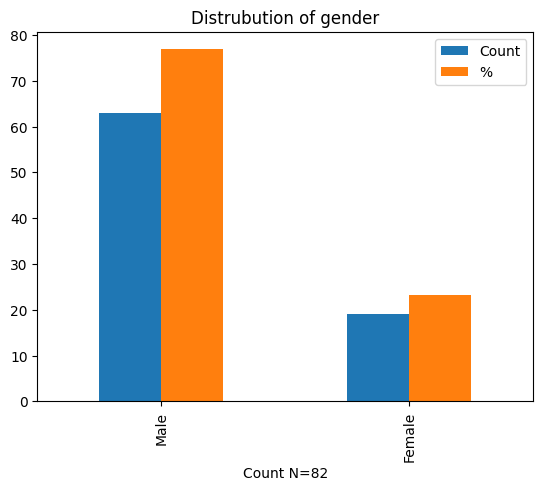

In [9]:
df_gender.plot.bar()

plt.title("Distrubution of gender")

plt.xlabel("Count N=82")

In [30]:
df_age=pd.crosstab(df["age"], "Count")
df_age.columns.name=""

In [31]:
min(df["age"])


20

In [32]:
max(df["age"])

61

In [42]:
age_bins =  [15, 25, 35, 45, 55, 65]

In [43]:
df["age_class"] = pd.cut(df["age"], bins = age_bins)

In [44]:
df

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,age_class
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,"(35, 45]"
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,"(25, 35]"
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,"(25, 35]"
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,"(35, 45]"
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,"(15, 25]"
...,...,...,...,...,...,...,...,...,...,...,...,...
77,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,"(15, 25]"
78,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,"(25, 35]"
79,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,"(25, 35]"
80,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,"(25, 35]"


In [45]:
df_age_class = pd.crosstab(df["age_class"], "Count")
df_age_class.columns.name = ""
n = df_age_class["Count"].sum()
df_age_class["%"] = df_age_class / n * 100
df_age_class.index = df_age_class.index.astype(str)
df_age_class.loc["Total"] = df_age_class.sum()
df_age_class.style.format({'Count': '{:.0f}', '%': '{:.1f} %'})


,Count,%
age_class,,
"(15, 25]",7,8.5 %
"(25, 35]",28,34.1 %
"(35, 45]",31,37.8 %
"(45, 55]",11,13.4 %
"(55, 65]",5,6.1 %
Total,82,100.0 %


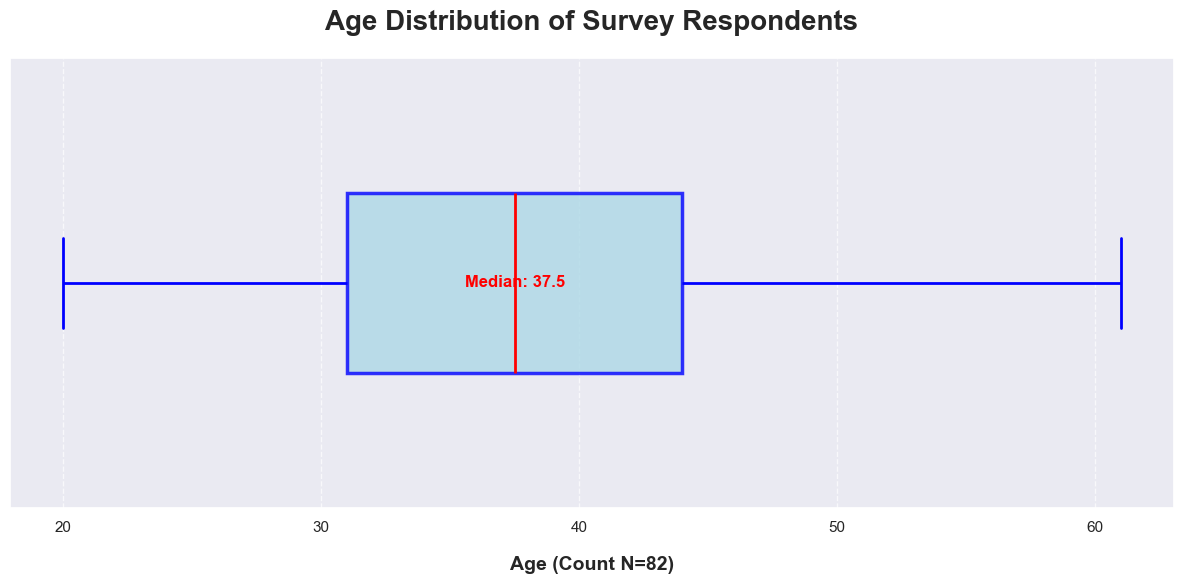

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame that contains the "age" column

# Get the count of values in the "age" column
age_count = df['age'].count()

# Set the style for the plot
sns.set(style="darkgrid")

# Create the figure and plot
plt.figure(figsize=(12, 6))

# Create the boxplot with enhanced visual styles
boxplot = sns.boxplot(
    data=df,
    x="age",
    color="lightskyblue",
    width=0.4,
    linewidth=2.5,  # Thicker box edges
    fliersize=6,  # Size of outliers (fliers)
    boxprops=dict(edgecolor="blue", facecolor="lightblue", alpha=0.8),  # Box color
    medianprops=dict(color="red", linewidth=2),  # Median line color and width
    whiskerprops=dict(color="blue", linewidth=2),  # Whisker color and thickness
    capprops=dict(color="blue", linewidth=2)  # Cap (top/bottom whisker caps)
)

# Add title and labels with enhanced styling
plt.title("Age Distribution of Survey Respondents", fontsize=20, weight='bold', pad=20)
plt.xlabel(f"Age (Count N={age_count})", fontsize=14, weight='bold', labelpad=15)
plt.ylabel("")  # No ylabel for horizontal boxplot

# Add a grid for better readability
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Add the median value as a label on the plot for clarity
median_age = df['age'].median()
plt.text(median_age, 0, f'Median: {median_age}', color='red', ha='center', va='center', fontsize=12, weight='bold')

# Show the plot
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count, N = 81')

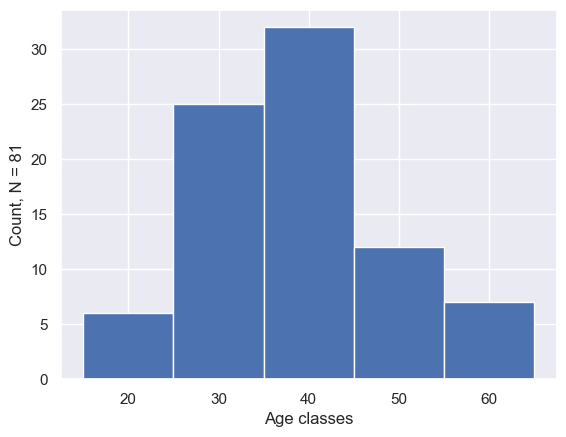

In [62]:
df["age"].hist(bins = age_bins)
plt.xlabel("Age classes")
plt.ylabel("Count, N = " + str(n))

In [63]:
df_sat_management = pd.crosstab(df["sat_management"], "Count")
df_sat_management.columns.name = ""
df_sat_management.index = ["Very unsatisfied", "Unsatisfied", "Neutral", "Satisfied", "Very Satisfied"]
n = df_sat_management["Count"].sum()
df_sat_management["%"] = df_sat_management / n * 100
df_sat_management.index = df_sat_management.index.astype(str)
df_sat_management.loc["Total"] = df_sat_management.sum()
df_sat_management.style.format({'Count': '{:.0f}', '%': '{:.1f} %'})


,Count,%
Very unsatisfied,7,8.5 %
Unsatisfied,16,19.5 %
Neutral,30,36.6 %
Satisfied,23,28.0 %
Very Satisfied,6,7.3 %
Total,82,100.0 %


Text(0.5, 0, 'Count N=82')

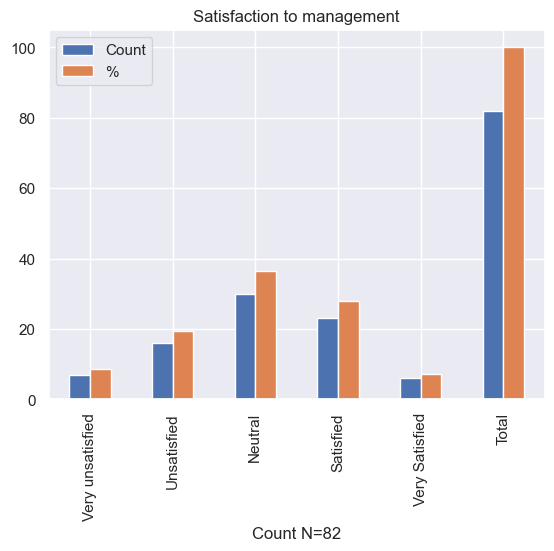

In [64]:
df_sat_management.plot.bar()

plt.title("Satisfaction to management")

plt.xlabel("Count N=82")

In [65]:
df_sat_colleques = pd.crosstab(df["sat_colleques"], "Count")
df_sat_colleques.columns.name = ""
df_sat_colleques.index = "Unsatisfied", "Neutral", "Satisfied", "Very Satisfied"
desired_index = ["Very unsatisfied", "Unsatisfied", "Neutral", "Satisfied", "Very Satisfied", "Total"]
n = df_sat_colleques["Count"].sum()
df_sat_colleques["%"] = df_sat_colleques / n * 100
df_sat_colleques.index = df_sat_colleques.index.astype(str)

df_sat_colleques.style.format({'Count': '{:.0f}', '%': '{:.1f} %'})
df_sat_colleques.loc["Total"] = df_sat_colleques.sum()
df_sat_colleques.reindex(desired_index, fill_value=0)



,Count,%
Very unsatisfied,0.0,0.000000
Unsatisfied,3.0,3.703704
Neutral,16.0,19.753086
Satisfied,35.0,43.209877
Very Satisfied,27.0,33.333333
Total,81.0,100.000000
